# Numpy arrays workflow

In [2]:
import numpy as np

# 1d
a = np.array([1,2,3])

# 2d
b = np.array(
    [[1,2],
    [3,4]]
)
print(b)

[[1 2]
 [3 4]]


# Mathematics on np arrays

In [3]:
a = np.array([
    [1,0,0],
    [2,3,4],
    [4,3,2]
])

b = np.array([
    [3,2,4],
    [5,6,3],
    [1,2,3]
])

print(a+b)
print(a-b)
print(a*b)
print(a/b)

[[4 2 4]
 [7 9 7]
 [5 5 5]]
[[-2 -2 -4]
 [-3 -3  1]
 [ 3  1 -1]]
[[ 3  0  0]
 [10 18 12]
 [ 4  6  6]]
[[0.33333333 0.         0.        ]
 [0.4        0.5        1.33333333]
 [4.         1.5        0.66666667]]


In [4]:
a = np.array([
    [1,0,0],
    [2,3,4],
    [4,3,2]
])

# a.max()
# a.min()

np.max(a)
np.min(a)
np.average(a)

2.111111111111111

# Find max after-tax income in group of people

In [5]:
alice = [99, 101, 103]
bob = [110, 108, 105]
tim = [90, 88, 85]

salaries = np.array([alice, bob, tim])
taxation = np.array([
    [0.2, 0.25, 0.22],                     
    [0.4, 0.5, 0.5],                         
    [0.1, 0.2, 0.1]
])

income = salaries * (1 - taxation)
print(income)
np.max(salaries * (1 - taxation))

[[79.2  75.75 80.34]
 [66.   54.   52.5 ]
 [81.   70.4  76.5 ]]


81.0

# Np slicing, broadcasting, indexing

In [6]:
a = np.array([1,2,3,4,5,6,7,8,9])
#print(a[1:3])

b = np.array([
    [1,2,3,4],
    [5,6,7,8],
    [9,10,11,12],
    [13,14,15,16],
])

#print(b[:, 1][::2])

# shape of arrays
print(b.shape)

(4, 4)


# Increase salaries of only one profession

In [7]:
dataScientist =     [130, 132, 137]
productManager =    [127, 140, 145]
designer =          [118, 118, 127]
softwareEngineer =  [129, 131, 137]

employees = np.array([
    dataScientist,
    productManager,
    designer,
    softwareEngineer
])

employees[0, ::2] = employees[0, ::2] * 1.1
employees

array([[143, 132, 150],
       [127, 140, 145],
       [118, 118, 127],
       [129, 131, 137]])

# Find very polluted cities (nonzero + broadcasting) 

In [8]:
X = np.array([
    [ 42, 40, 41, 43, 44, 43 ], # Hong Kong
    [ 30, 31, 29, 29, 29, 30 ], # New York
    [ 8, 13, 31, 11, 11, 9 ], # Berlin
    [ 11, 11, 12, 13, 11, 12 ] # Montreal
])

cities = np.array(["Hong Kong", "New York", 'Berlin', 'Montreal'])

# my solution
cities[np.nonzero((np.array([np.average(row) for row in X]) > np.average(X)))]

# set(cities[np.nonzero(X > np.average(X))[0]])

array(['Hong Kong', 'New York'], dtype='<U9')

In [9]:
# Go back to the taxation example in “Basic Two-Dimensional Array Arithmetic” on page 42 and pull the name of the person with the highest salary from the matrix by using this idea of selective Boolean indexing. Problem recap: How do we find the person with maximum after-tax income in a group of people, given their yearly salary and tax rates?

names = np.array(['alice', 'bob', 'tim'])

alice = [99, 101, 103]
bob = [110, 108, 105]
tim = [90, 88, 85]

salaries = np.array([alice, bob, tim])
taxation = np.array([
    [0.2, 0.25, 0.22],                     
    [0.4, 0.5, 0.5],                         
    [0.1, 0.2, 0.1]
])

income = salaries * (1 - taxation)

names[np.nonzero(income == np.max(income))[0]][0]

'tim'

In [10]:
# Find instagram best superstars with boolean indexing

inst = np.array([
    [232, "@instagram"],                 
    [133, "@selenagomez"],                 
    [59,  "@victoriassecret"],                
    [120, "@cristiano"],                 
    [111, "@beyonce"],                 
    [76,  "@nike"]
])

goal_subs_num = 100

inst[inst[:, 0].astype(int) > goal_subs_num, 1]


array(['@instagram', '@selenagomez', '@cristiano', '@beyonce'],
      dtype='<U21')

# Reshaping arrays

In [11]:
a = np.array([1,2,3,4,5,6])
a.reshape((2,-1))

solar_x = np.array([
    [1,2,3],
    [4,5,6]
])

np.average(solar_x, axis=1)

array([2., 5.])

# Replace seventh temp value with average

In [16]:
## Sensor data (Mo, Tu, We, Th, Fr, Sa, Su)
tmp = np.array([
    1, 2, 3, 4, 3, 4, 4,
    5, 3, 3, 4, 3, 4, 6,
    6, 5, 5, 5, 4, 5, 5
])

tmp[6::7] = np.average(tmp.reshape((-1, 7)), axis=1)
tmp

array([1, 2, 3, 4, 3, 4, 3, 5, 3, 3, 4, 3, 4, 4, 6, 5, 5, 5, 4, 5, 5])

# Find top 3 students by Marx (Karl)

In [20]:
sat_scores = np.array([1100, 1256, 1543, 1043, 989, 1412, 1343])
students = np.array(["John", "Bob", "Alice", "Joe", "Jane", "Frank", "Carl"])

students[np.argsort(sat_scores)[-3:]]

array(['Carl', 'Frank', 'Alice'], dtype='<U5')

# Check if number is from fibonacci sequence

In [41]:
def is_fib(number, el1=0, el2=1):
    if number == el1 or number == el2:
        return True
    elif number > el2:
        return is_fib(number, el2, el1+el2)
    return False 

# is_fib(8)

is_fibl = lambda num, a=0, b=1: True if num == a or num == b else (is_fibl(num, b, a+b) if num > b else False)
# usage: is_fibl(13)

is_arr_fibl = lambda arr: [is_fibl(num) for num in arr]
# usage: is_arr_fibl([1, 10, 13])

[True, False, True]

# Filter low-rating books

In [46]:
bs = np.array([
    ['Coffee Break NumPy', 4.6],
    ['Lord of the Rings', 5.0],
    ['Harry Potter', 4.3],
    ['Winnie-the-Pooh', 3.9],
    ['The Clown of God', 2.2],
    ['Coffee Break Python', 4.7],
])

filter_books = lambda books, min_rate: [book for book in books if float(book[1]) > min_rate]

predict_bestsellers = lambda books, min_rate: books[books[:,1].astype(float) > min_rate]

# filter_books(bs, 4.5)
predict_bestsellers(bs, 4.5)

array([['Coffee Break NumPy', '4.6'],
       ['Lord of the Rings', '5.0'],
       ['Coffee Break Python', '4.7']], dtype='<U32')

# Create list of deviated numbers, build a histogram

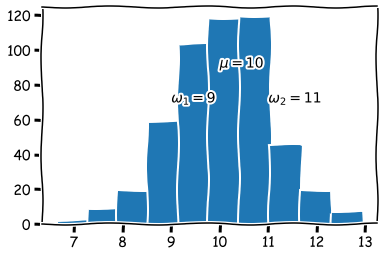

In [49]:
import matplotlib.pyplot as plt

seq = np.random.normal(10, 1, 500)


plt.xkcd()
plt.hist(seq)

plt.annotate(r'$\omega_1=9$', (9,70))
plt.annotate(r"$\omega_2=11$", (11, 70))
plt.annotate(r"$\mu=10$", (10, 90))
plt.show()